# Primeiros passos em Julia

Há várias fontes de informação sobre a linguagem Julia. Vejam, por exemplo, os links informados no início do caderno anterior. Em particular,

* Guias rápidos
  * [Julia Documentation](https://docs.julialang.org/en/v1/)
  * [Getting Started with Julia (QuantEcon)](https://julia.quantecon.org/getting_started_julia/index.html)
  * [A via rápida para Julia 1.0](https://juliadocs.github.io/Julia-Cheat-Sheet/br/)
  * [MATLAB–Python–Julia cheatsheet (QuantEcon)](https://cheatsheets.quantecon.org)
  * [Noteworthy Differences from other Languages](https://docs.julialang.org/en/v1/manual/noteworthy-differences/)
* Mais detalhados
  * [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html)
  * [Introducing Julia](https://en.wikibooks.org/wiki/Introducing_Julia)
  * [A Deep Introduction to Julia for Data Science and Scientific Computing](http://ucidatascienceinitiative.github.io/IntroToJulia/)

Não pretendo reinventar a roda, aqui. Sugiro que vejam pelo menos uns dois links dos mencionados. Em particular, [Mathematical Operations and Elementary Functions](https://docs.julialang.org/en/v1/manual/mathematical-operations/#Mathematical-Operations-and-Elementary-Functions), da documentação. A documentação do Julia é muito boa!

Se você está acostumado com python, por exemplo, veja [Noteworthy differences from Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python).

Vou apenas fazer alguns comentários que considero relevantes.

## Blocos de código

Identar o código é extramemente recomendado, mas, contrariamente ao python, não é obrigatório. Por isso, é necessário concluir os blocos com `end`.

A vantagem disso é que é fácil copiar um código e rodar em outro ambiente, como no REPL, por exemplo, sem se preocupar com o processo de copiar e colar modificar a identação.

In [1]:
for i = 1:5
    println(i)
end

1
2
3
4
5


## Caracteres unicode

Caracteres unicode podem, e costumam ser, usados como variáveis. Você pode obtê-los, *em células de código*, digitando o símbolo deles seguido de `<tab>`. Vários nomes são derivados da denominação deles em latex. Por exemplo, para obter $\pi$ acima, basta digitar `\pi<tab>`.

Para uma lista completa dos caracteres unicodes obtidos completando com `<tab>`, veja [Unicode Input](https://docs.julialang.org/en/v1/manual/unicode-input/).

Subescritos e superescritos podem ser obtidos com `^\` e `_\`, seguidos de `<tab>`. Por exemplo $x_1$ é obtido com `x\_1<tab>`.

Outros "adereços" tambem podem ser obtidos com `<tab>`, por exemplo, $\bar x$ é obtido com `x\bar<tab>` e $\tilde x$, com `x\tilde<bar>`.

Aproveitando a questão da notação, a multiplicação entre um número e um símbolo *não precisa* usar o símbolo de multiplicação `*`.

Exemplos:

In [2]:
ϵ = 0.01
ξ = 0:0.01:2π
η = sin.(ξ)
ξ̄ = ξ[argmax(η)]
println("Máximo de ξ ↦ sin(ξ) em ξ̄ = $ξ̄.")
error = abs(ξ̄ - π/2) < ϵ ? "Dentro da margem de erro ϵ = $ϵ em relação ao valor esperado π/2." :
    "Fora da margem de error ϵ = $ϵ em relação ao valor esperado π/2."
println(error)

Máximo de ξ ↦ sin(ξ) em ξ̄ = 1.57.
Dentro da margem de erro ϵ = 0.01 em relação ao valor esperado π/2.


## Broadcasting e o "operador ponto"

O operador ponto aplica uma operação a cada elemento de um vetor ou matriz ou adiciona um escalar a cada componente de um vetor. O operador ponto está diretamente ligado ao operador de *broadcasting*. Veja mais sobre isso em *([dot operators](https://docs.julialang.org/en/v1/manual/mathematical-operations/#man-dot-operators))* e *[broadcasting](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting)*. Por aqui, fiquemos com os seguintes exemplos.

In [3]:
@show 2^2
@show [1,2,3].^2
@show [1 2; 3 4].^2
@show sin.([0, π/4, π/2, π])
@show 1 .+ [1,2,3,4]
nothing

2 ^ 2 = 4
[1, 2, 3] .^ 2 = [1, 4, 9]
[1 2; 3 4] .^ 2 = [1 4; 9 16]
sin.([0, π / 4, π / 2, π]) = [0.0, 0.7071067811865475, 1.0, 1.2246467991473532e-16]
1 .+ [1, 2, 3, 4] = [2, 3, 4, 5]


## Atribuição e variáveis mutáveis e imutáveis

Alguns objetos são mutáveis, enquanto que outros, não. Um objeto mutável pode ter os seus valores alterados. Já um objeto imutável, não, mas ele pode ser redefinido.

Isso pode ser visto explicitamente pelo seu ponteiro (pelo menos em alguns casos).

### Atribuição de vetores

Por exemplo. Um vetor é imutável, mas os seu valores, não. Se mudarmos apenas o valor de um ou mais de seus elementos, ele continua apontando para o mesmo local na memória. Já se o redefinirmos, ele pode passar a apontar para outro lugar. Isso é visivelmente natural se pensarmos que, nesse processo, podemos acabar alterando o tamanho do vetor e, com isso, pode ser necessário mudá-lo de posição para que ele caiba na memória.

Essa mudança no apontamento quando redefinimos uma variavel imutável pode ou não acontecer. Ela não é obrigatória. Mas ela nunca é alterada quando o valor, mutável, de uma variável é alterado.

In [4]:
a = [0, 1] # definição inicial de `a`
@show pointer(a)
a = [2, 3] # redefinindo `a` para um vetor de mesmo comprimento
@show pointer(a)
a = [4, 5, 6] # redefindo `a` para um vetor de comprimento diferente
@show pointer(a)
a[1] = 7 # modificando um elemento de `a`
@show pointer(a)
a[1:3] = [8,9,0] # modificando todos os elementos de `a`
@show pointer(a)
nothing

pointer(a) = Ptr{Int64} @0x00000001311f7050
pointer(a) = Ptr{Int64} @0x0000000132062090
pointer(a) = Ptr{Int64} @0x0000000131ba5080
pointer(a) = Ptr{Int64} @0x0000000131ba5080
pointer(a) = Ptr{Int64} @0x0000000131ba5080


### Atribuição de strings

*Strings* também são imutáveis.

In [5]:
s = "Equações diferenciais"
@show pointer(s)
s = "Modelagem Matemática"
@show pointer(s)
s = replace(s, "Modelagem" => "Modelos")[1:end-1]*"os"
@show pointer(s)
@show s
nothing

pointer(s) = Ptr{UInt8} @0x0000000131bc6598
pointer(s) = Ptr{UInt8} @0x0000000131bc65c8
pointer(s) = Ptr{UInt8} @0x0000000118df4b88
s = "Modelos Matemáticos"


### Cuidados com a atribuição de variáveis imutáveis

No caso de um objeto imutável mas com elementos mutáveis (e.g. *arrays*, *dicts*, *sets*), é preciso termos cuidado quando tentamos copiá-lo.

A atribuição pura e simples não acarreta em uma cópia, ela faz com que o novo objeto faça referência ao mesmo objeto. Assim, se modificarmos os valores mutáveis do objeto original, o novo objeto sofrerá as mesmas mudanças.

No exemplo abaixo, observe que a redefinição da variável imutável `p1` não afetou `p2`, mas a mudança nos valores mutáveis de `p3` afetou `p4`.

Para evitar isso, é preciso usar `copy`. Nesse caso, vemos que `p5` não sofreu alteração.

In [6]:
p1 = [10,20]
p2 = p1
p1 = [30,40]
@show p1
@show p2
p3 = [50,60]
p4 = p3
p5 = copy(p3)
p3[1:2] = [70,80]
@show p3
@show p4
@show p5
nothing

p1 = [30, 40]
p2 = [10, 20]
p3 = [70, 80]
p4 = [70, 80]
p5 = [50, 60]


## Condicional

Temos, naturalmente, os fluxos condicionais de controle

```julia
if condicional
    expr1
else
    expr2
end
```

e

```julia
if condicional1
    expr1
elseif condicional2
    expr2
...
else
    expr3
end
```

Em pequenas expressões, pode ser conveniente escrever isso em uma única linha:

```julia
if condicional expr1 else expr2 end
```   

## Operador ternário

O operador ternário

```julia
condicional ? expr1 : expr2
```

está relacionado com a condição `if else end` e é comumente utilizado em atribuições.

In [7]:
test = rand(UInt8)
resultado = isodd(test) ? "$test é impar" : "$test é par"
test += 1
@show resultado
resultado = isodd(test) ? "$test é impar" : "$test é par"
@show resultado
nothing

resultado = "134 é par"
resultado = "135 é impar"


## Interpolação

Observe que acima usamos o símbolo `$` dentro de uma string. Ele é chamado de operador de **interpolação**. Ele substitui o valor da váriável na string.

Se quisermos escrever `$` precisamos "escapá-lo" com uma barra invertida:

In [8]:
valor = 10.0
println("Esse produto cuta R\$$valor")

Esse produto cuta R$10.0


## Escopo

Várias construções envolvem tipos diferentes de escopo. Há três tipos de escopo: **global**, **local flexível** e **local rígido** (numa tradução livre de *global*, *local (soft)* e *local (hard)*.) Os escopos locais podem ser encadeados.

Veja o tipo de escopo de cada construção em [Scope constructs](https://docs.julialang.org/en/v1/manual/variables-and-scoping/#man-scope-table).

Para entender em detalhes como cada escopo local funciona, veja [Local Scope](https://docs.julialang.org/en/v1/manual/variables-and-scoping/#Local-Scope). Vamos ver alguns exemplos.

### Escopo em loops

Um exemplo que requer particular atenção é em loops *for* e *while*. O escopo é do tipo local flexível. Depende de uma variável estar ou não definida fora do loop.

In [9]:
for i = 1:2
    x = "iteração de número $i" # variável local
    println(x)
end

iteração de número 1
iteração de número 2


In [10]:
@isdefined(x)

false

Como `x` só foi definido dentro do loop `for`, ela não persistiu no escopo global. Observe que esse comportamento é diferente do do python, onde não apenas `x` está definido como a variável auxiliar `i`, também. 🤷‍

In [11]:
i = 0
y = "iteração de número $i"
println(y)
for i = 1:2
    y = "iteração de número $i" # variável local
    println(y)
end
println(y)

iteração de número 0
iteração de número 1
iteração de número 2
iteração de número 2


Agora vemos que `y` foi atualizado dentro do loop.

Mais delicado é quando atribuímos uma variável global a uma nova variável local e a atualizamos

In [12]:
z = 0 # global
for i = 1:10
    w = z + i # local
    z = w # atualização global
end
@show z
@isdefined(w)

z = 55


false

Se quisermos definir uma variável global dentro de um loop, podemos usar `global`:

In [13]:
num = 5
for i = 1:num
    global u = i == 1 ? 1 : i*u
end
@show u

u = 120


120

O que representa `u` em relação a `num`?

## Funções

Assim como qualquer bloco, funções precisam ser terminadas com `end`. Além disso, o comando `return` é opcional para indicar o que será retornado pela função. Caso ele não seja usado, a última expressão executada é automaticamente retornada.

A recomendação, no entanto, é de que o comando `return` seja sempre usado, para maior clareza. A exceção é quando a função é definida em uma única linha de comando.

In [14]:
f(ζ) = 1 + ζ^2 + ζ^4 + ζ^6

function g(ζ)
    η = 1
    for i = 2:2:6
        η += ζ^i
    end
    return η
end

@show f(2)
@show g(2)
nothing

f(2) = 85
g(2) = 85


### Funções com variáveis mutáveis e imutáveis

É preciso tomar cuidado ao alterarmos variáveis dentro de uma função.

Se alterarmos uma variável imutável, isso não afetará a variável original passada para a função. Mas se alteramos um elemeto mutável, isso a afetará.

Funções que afetam um ou mais argumentos são usualmente denotadas com o sufixo `!`. Isso é apenas uma convenção. Esse símbolo não *faz* nada de especial.

In [15]:
function h(ρ)
    ρ̄ = copy(ρ)
    ρ = 2 .*ρ
    return ρ + ρ̄
end

function h!(ρ)
    ρ̄ = copy(ρ)
    ρ[1:end] = 2 .*ρ[1:end]
    return ρ + ρ̄
end

xx = [1,2]
yy = [1,2]

@show xx
@show h(xx)
@show xx
@show yy
@show h!(yy)
@show yy
nothing

xx = [1, 2]
h(xx) = [3, 6]
xx = [1, 2]
yy = [1, 2]
h!(yy) = [3, 6]
yy = [2, 4]


## Tipos e múltiplos despachos

Julia não é uma linguagem orientada a objeto. Ela é fortemente baseada em **tipos** e em **múltiplos despachos** *(ou multiple dispatch)*. Isso é uma das coisas que a torna bastante poderosa. 🚀

Isso facilita bastante, por exemplo, o processo de estender funções e pacotes. Com ela, é fácil adaptar funções de um pacote de otimização (e.g. [Flux.jl](https://fluxml.ai/Flux.jl/stable/) para trabalhar com funções objetivo dependentes de soluções de equações diferenciais implementadas em outro pacote (e.g. [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/) e assim por diante.

Em uma linguagem orientada a objeto, qualquer adaptação do gênero requer que todos os métodos sejam reescritos para novos objetos, sem contar com toda a verbose incluída.

Este não é um curso sobre Julia, então não vamos entrar em muitos detalhes, mas é importante saber sobre essa característica fundamental da linguagem. E gostaria de fazer um pequeno exemplo para exibir o poder disso.

### Ordenando listas

Podemos, naturalmente, ordenar uma lista de números. Isso pode ser feito com a função `sort`. Há vários métodos de ordenação implementados, mas não vamos nos preocupar com isso.

Podemos, também, ordenar pares ordenados e strings, em ordem lexicográfica.

In [16]:
@show sort([4,1,3])
@show sort(["d", "a", "c"])
nothing

sort([4, 1, 3]) = [1, 3, 4]
sort(["d", "a", "c"]) = ["a", "c", "d"]


### Ordenando retângulos

Digamos, agora, que queiramos definir um objeto "retângulo", cujas propriedades são os tamanhos dos seus lados. Para isso, definimos um *struct* com essas propriedades:

In [17]:
struct Retângulo
    lado1:: Float64
    lado2:: Float64
end

R1 = Retângulo(2,3)
R2 = Retângulo(1.5, 6)
R3 = Retângulo(1.2,7)
R4 = Retângulo(3,2)

R1, R2, R3, R4

(Retângulo(2.0, 3.0), Retângulo(1.5, 6.0), Retângulo(1.2, 7.0), Retângulo(3.0, 2.0))

Para qualquer retângulo, podemos definir a sua área. Podemos fazer isso definindo uma função atuando em dois argumentos **do tipo Retângulo**.

In [18]:
area(R::Retângulo) = R.lado1 * R.lado2

@show area(R1)
@show area(R2)
@show area(R3)
@show area(R4)

area(R1) = 6.0
area(R2) = 9.0
area(R3) = 8.4
area(R4) = 6.0


6.0

Agora, pode ser interessante comparar os retângulos de acordo com as suas áreas. As funções binárias `<, ==, >` não estão definidas para retângulos. Mas podemos defini-las.

Um problema é que elas já existem para outros objetos. Assim, precisamos **estender** as definições para o nosso novo objeto. Isso precisa ser feito importando a função do módulo onde ela está definida.

Essas funções estão definidas no módulo Base. E na verdade só precisamos importar `isless` e `==`, pois os outros operadores são definidos em função desses.

Podemos importar toda o módulo `Base`, mas isso é desnecessário. Vamos importar apenas o que precisamo estender.

Para estender, definimos não só o valor desejado da operação mas em que tipo ela se aplica.

In [19]:
import Base: isless, ==

==(R::Retângulo, R̄::Retângulo) = area(R) == area(R̄)
isless(R::Retângulo, R̄::Retângulo) = area(R) < area(R̄)

@show isless(R1,R2)
@show isless(R1,R4)
@show R1 == R4

isless(R1, R2) = true
isless(R1, R4) = false
R1 == R4 = true


true

Agora a primeira "mágica" aparece. Como dito acima, `<` e `>` são definidas a partir de `isless` e `==`. Assim, essas operações são automaticamente estendidas.

In [20]:
@show R1 < R3
@show R1 > R3
nothing

R1 < R3 = true
R1 > R3 = false


Agora a segunda "mágica". A função de ordenação `sort` também é definida a partir de `isless` e `==` e está automaticamente estendida para os nosss retângulos.

In [21]:
ordenados = sort([R1, R2, R3, R4])
for (i,R) in enumerate(ordenados)
    println("$(i)ᵒ: $R com área $(area(R))")
end

1ᵒ: Retângulo(2.0, 3.0) com área 6.0
2ᵒ: Retângulo(3.0, 2.0) com área 6.0
3ᵒ: Retângulo(1.2, 7.0) com área 8.4
4ᵒ: Retângulo(1.5, 6.0) com área 9.0


Da mesma forma, podemos imediatamente obter os valores máximo, mínimos e os respectivos retângulos:

In [22]:
println("Mínimo $(minimum([R1, R2, R3, R4])) em $(argmin([R1, R2, R3, R4]))")

Mínimo Retângulo(2.0, 3.0) em 1


## Álgebra linear

Várias ferramentas de álgebra linear estão diretamente disponíveis na `Base`. Outras no módulo [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/) da biblioteca padrão.

Na `Base`, podemos multiplicar matrizes (composição) e resolver um sistema (`A\v` nos dá o vetor `u` tal que`Av = u`, caso seja possível, ou resolve o problema de mínimos quadrados associado).

In [23]:
vec = [1,2]
mat = [1 3; 4 5]
@show mat
@show mat' # transposta
@show copy(mat') # transposta com tipo matriz
@show vec
@show mat * vec
@show mat \ vec
@show mat * (mat \ vec) - vec
nothing

mat = [1 3; 4 5]
mat' = [1 4; 3 5]
copy(mat') = [1 4; 3 5]
vec = [1, 2]
mat * vec = [7, 14]
mat \ vec = [0.1428571428571429, 0.2857142857142857]
mat * (mat \ vec) - vec = [0.0, 0.0]


Algumas operações podem ser feitas tanto como matrizes, como $A^2$ e $e^A$, como elemento a elemento, com o operador ponto.

In [24]:
@show mat^2
@show mat.^2
@show exp(mat)
@show exp.(mat)
nothing

mat ^ 2 = [13 18; 24 37]
mat .^ 2 = [1 9; 16 25]
exp(mat) = [274.4341991879927 411.0994796202318; 548.1326394936425 822.5668386816352]
exp.(mat) = [2.718281828459045 20.085536923187668; 54.598150033144236 148.4131591025766]


Outras operações importantes estão em [LinearAlgebra](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/).

O produto vetorial entre dois vetores, por exemplo, pode ser calculado de várias formas.

Uma opção e utilizando o operador ponto para somar elemento a elemento e em seguida somando-se os elementos do vetor resultante.

Outra é através das poderosas funções `map`, `reduce`, `mapreduce` e variantes.

Ou através do produto escalar disponível em `LinearAlgebra`. Este último tem a vantagem de ser bem mais rápido, como veremos em seguida.

In [25]:
using LinearAlgebra

vec1 = [1.2, 3.1, -4.5, 2.1, -2.3, 10.1]
vec2 = [0.3, -1.2, -5.2, -1.2, 20.1, 5.7]
println(sum(vec1 .* vec2))
println(mapreduce(elem -> elem[1]*elem[2], +, zip(vec1, vec2)))
println(let p = 0; for i in 1:length(vec1) p += vec1[i]*vec2[i] end; p end)
println(vec1 ⋅ vec2)
nothing

28.860000000000007
28.860000000000007
28.860000000000007
28.860000000000007


O módulo `LinearAlgebra` nos dá diversas outras ferramentas, como cálculo de autovalores, autovetores normalizados, decomposição SVD, etc..

In [26]:
eigen([1 3; 4 5])

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.0
  7.0
vectors:
2×2 Matrix{Float64}:
 -0.83205  -0.447214
  0.5547   -0.894427

In [27]:
svd([1 3; 4 5])

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.428878  -0.903362
 -0.903362   0.428878
singular values:
2-element Vector{Float64}:
 7.072510139298386
 0.9897476090001659
Vt factor:
2×2 Matrix{Float64}:
 -0.571555  -0.820564
  0.820564  -0.571555

## Gráficos

Há vários pacotes de gráficos.

Há muito o que ser explorado em termos de gráficos, mas, aqui, vamos nos limitar a exibir alguns poucos exemplos utilizando o [Plots.jl](http://docs.juliaplots.org/latest/).

In [28]:
using Plots
gr()
theme(:ggplot2)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


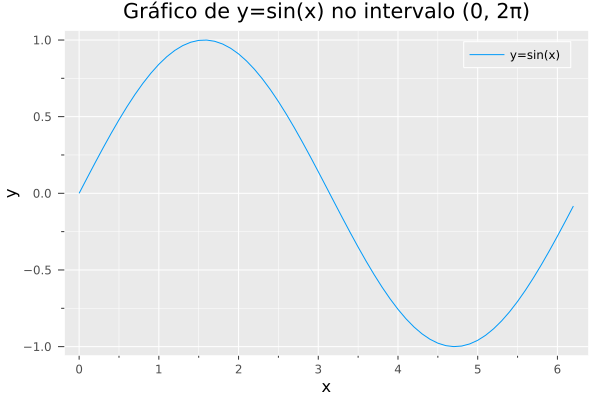

In [29]:
I = 0.0:0.1:2π
plot(I, sin.(I), xaxis="x", yaxis="y", label="y=sin(x)",
    title="Gráfico de y=sin(x) no intervalo (0, 2π)")

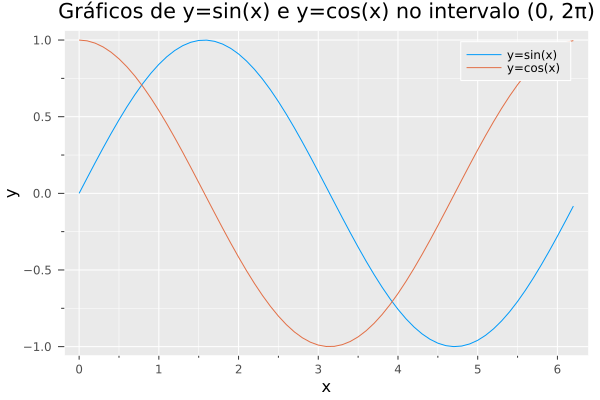

In [30]:
I = 0.0:0.1:2π
plot(I, [sin.(I), cos.(I)], xaxis="x", yaxis="y", label=["y=sin(x)" "y=cos(x)"],
    title="Gráficos de y=sin(x) e y=cos(x) no intervalo (0, 2π)")

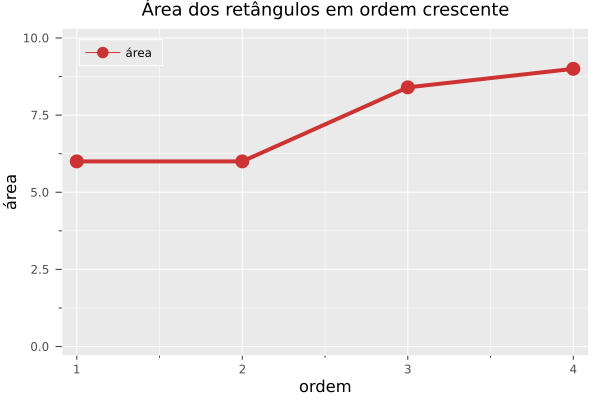

In [31]:
plot(area.(ordenados), xaxis="ordem", yaxis="área", label="área", color=:brown3,
    marker = :circle, markersize = 8, linewidth = 4, 
    title="Área dos retângulos em ordem crescente", titlefontsize=12,
    legend=:topleft, ylims=(0.0, 10.0)
)

## Performance

A macro `@time` nos dá alguma informação sobre o tempo de execução, número de alocações e memória utilizada na execução de alguma linha ou bloco de código.

In [32]:
@time length("Modelagem Matemática"^1000)
@time begin
    s = "Modelagem Matemática"
    s ^= 1000
    length(s)
end
nothing

  0.000122 seconds (1 allocation: 20.625 KiB)
  0.003583 seconds (23 allocations: 22.000 KiB, 77.54% compilation time)


O pacote [JuliaCI/BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) é mais completo e dá mais informações para avaliar a performance dos códigos.

Em particular, ela executa o código várias vezes, para evitar ruído e retornar uma informação mais precisa sobre a performance.

Por exemplo, podemos comparar as diversas maneiras de se calcular o produto escalar entre dois vetores.

In [33]:
using BenchmarkTools

vec1 = rand(100)
vec2 = rand(100)

escalar1(vec1, vec2) = sum(vec1 .* vec2)
escalar2(vec1, vec2) = mapreduce(elem -> elem[1]*elem[2], +, zip(vec1, vec2))
escalar3(vec1, vec2) = let p = 0; for i in 1:length(vec1) p += vec1[i]*vec2[i] end; p end
escalar4(vec1, vec2) = vec1 ⋅ vec2

@show escalar1(vec1, vec2) ≈ escalar2(vec1, vec2) ≈ escalar3(vec1, vec2) ≈ escalar4(vec1, vec2)

@btime escalar1($vec1, $vec2)
@btime escalar2($vec1, $vec2)
@btime escalar3($vec1, $vec2)
@btime escalar4($vec1, $vec2)
nothing

escalar1(vec1, vec2) ≈ escalar2(vec1, vec2) ≈ escalar3(vec1, vec2) ≈ escalar4(vec1, vec2) = true
  140.230 ns (1 allocation: 896 bytes)
  132.895 ns (0 allocations: 0 bytes)
  263.867 ns (0 allocations: 0 bytes)
  43.228 ns (0 allocations: 0 bytes)


Para uma estatística mais detalhada, usamos `@benchmark`.

In [34]:
@benchmark escalar4(v, w) setup = (v=$vec1; w=$vec2)

BechmarkTools.Trial: 10000 samples with 990 evaluations.
 Range (min … max):  41.603 ns … 227.553 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     42.074 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   44.059 ns ±   5.520 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ██▂ ▂▂       ▄▄   ▃▂   ▁▃     ▁                              ▂
  ███▃██▆▄▆█▅▁▅███▆▇██▅▅▄███▇█▇▇█▇▅▅▅▇▇█▆▆▇▆▆▆▅▆▇▅▅▅▅▄▅▅▅▁▄▄▄▅ █
  41.6 ns       Histogram: log(frequency) by time        66 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.